In [1]:

#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
data = pd.read_csv('feature_time_48k_2048_load_1.csv')

#data['fault'] = pd.Categorical(data['fault'])
#Divide the data into training data and test data
X=data.iloc[:,:9]
y=data.iloc[:,9]
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 332)
#data processing
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
test_scaled = (x_test.values - scaler.mean_)/np.sqrt(scaler.var_)

print(x_train.shape)

data

(1840, 9)


,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


LogisticRegression(C=500, max_iter=200, n_jobs=-1)

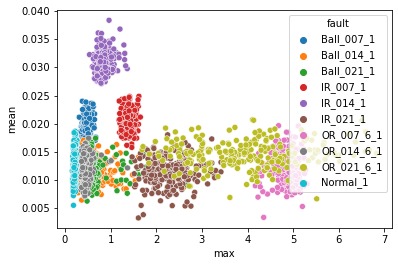

In [3]:
sns.scatterplot(x="max",y="mean",hue="fault",data=data)

#model logistic regression
#Cfloat, default=1.0, Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
#max_iterint, default=100, Maximum number of iterations taken for the solvers to converge.
#n_jobsint, default=None ,Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”.
#This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not.
#None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.




model_logistic = LogisticRegression(C = 500, max_iter = 200, n_jobs = -1)
model_logistic.fit(train_scaled, y_train)


In [4]:
#prediction model by train data
train_predictions = model_logistic.predict(train_scaled)
#prediction model by test data
test_predictions = model_logistic.predict(test_scaled)

#confultion matrix by train and test
train_confu_matrix = confusion_matrix(y_train, train_predictions)
test_confu_matrix = confusion_matrix(y_test, test_predictions)

<function matplotlib.pyplot.show(close=None, block=None)>

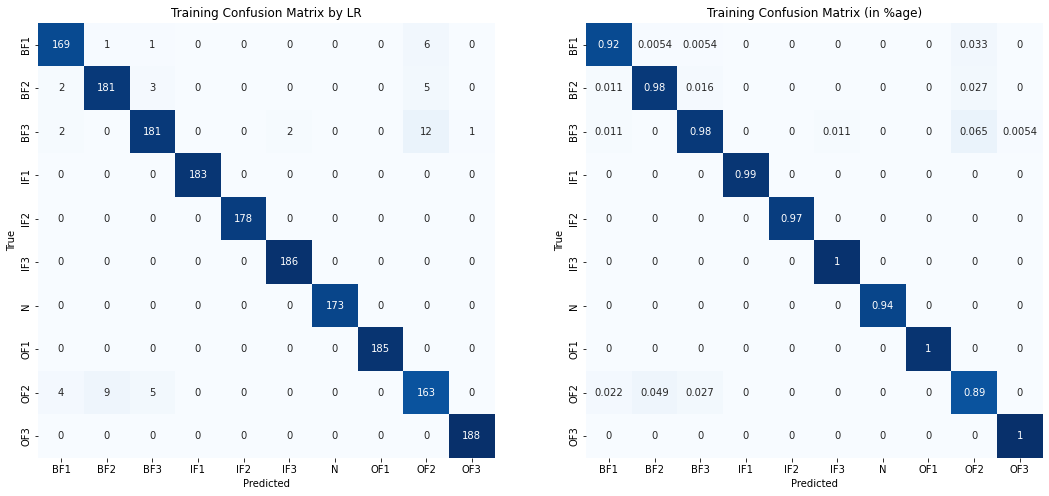

In [5]:
#Types of faults to be classified
fault_type = ['BF1','BF2','BF3','IF1','IF2','IF3','N','OF1','OF2','OF3']
#drawing order of confution matrix by train data
plt.figure(1,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
#Define the colors and labels on the x and y axis
xticklabels= fault_type , yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix by LR')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(train_confu_matrix/184, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

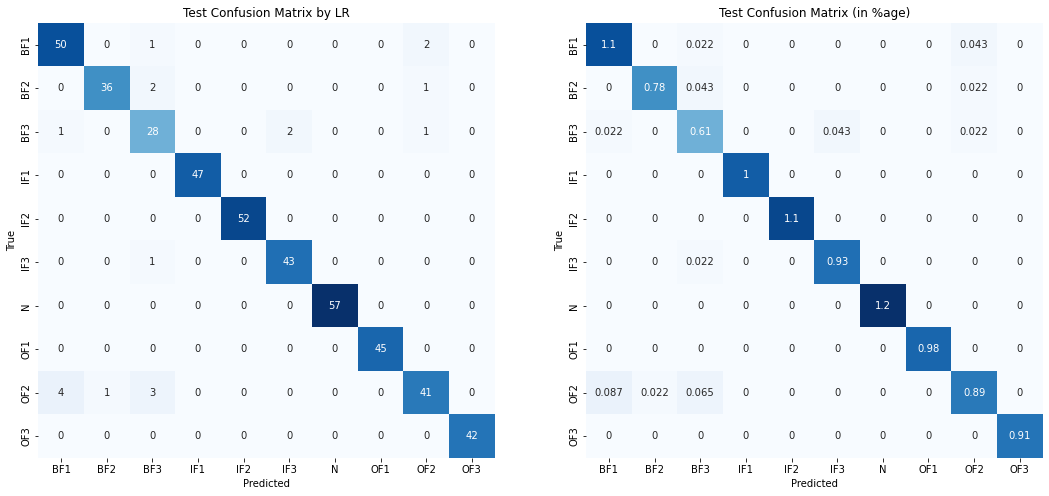

test accuracy by LR:  0.9586956521739131


In [6]:
#drawing order
plt.figure(2,figsize=(18,8))
plt.subplot(121)
#Here we specify the table to be drawn
sns.heatmap(test_confu_matrix, annot = True,
#Define the colors and labels on the x and y axis
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix by LR')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
#We repeat the first drawing, but in the form of a percentage
sns.heatmap(test_confu_matrix/46,annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Accuracy by model
test_accuracy_LR = accuracy_score(y_test, test_predictions)
print("test accuracy by LR: ", test_accuracy_LR)